In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# A função U(x, y)
def U_pot(x,y):
    return np.sin(x) * np.cos(y) + (x * y)**2 / 500


# Definindo os gradientes de potencial x e y
def Grad_pot(x, y):
    dgradx=np.cos(x)*np.cos(y)+x*y**2/250
    dgrady=-np.sin(x)*np.sin(y)+y*x**2/250
    return np.array([dgradx,dgrady])


In [2]:
# Descenso por gradiente
def grad_des(start, taxa_apre=0.1, max_itera=1000, tolerance=1e-6):
    caminho=[start]
    x,y=start
   
    for i in range(max_itera):
        grad=Grad_pot(x,y)
        passo=taxa_apre*grad
        x,y=x-passo[0],y-passo[1]
        caminho.append((x,y))
        if np.linalg.norm(passo) < tolerance:
            print(f"convergiu em {i+1} iterações")
            break
           
    return np.array(caminho)

In [3]:
# Crear malla para la gráfica 3D
x_valo = np.linspace(-3, 3, 100)
y_valo = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_valo, y_valo)
Z=U_pot(X, Y)


convergiu em 118 iterações


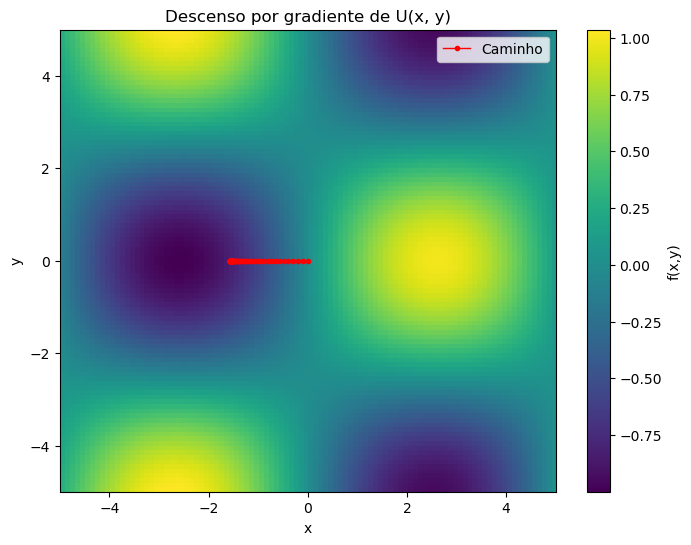

In [4]:
# Início de GD
pon_ini=(0,0)
caminho=grad_des(pon_ini, taxa_apre=0.1,tolerance=1e-6)
# converter caminho
caminho=np.array(caminho)
px=caminho[:,0]
py=caminho[:,1]
# Plot usando imshow
plt.figure(figsize=(8,6))
plt.imshow(Z,extent=[-5,5,-5,5],origin='lower',cmap='viridis',aspect='auto')
plt.colorbar(label='f(x,y)')
plt.plot(px,py,color='red',marker='o',markersize=3,linewidth=1,label='Caminho')
plt.title("Descenso por gradiente de U(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()